# Quantile Regression

[scikit-learn](http://scikit-learn.org/stable/) does not have a quantile regression. [mlinsights](http://www.xavierdupre.fr/app/mlinsights/helpsphinx/index.html) implements a version of it.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Simple example

We generate some dummy data.

In [3]:
import numpy
X = numpy.random.random(1000)
eps1 = (numpy.random.random(900) - 0.5) * 0.1
eps2 = (numpy.random.random(100)) * 10
eps = numpy.hstack([eps1, eps2])
X = X.reshape((1000, 1))
Y = X.ravel() * 3.4 + 5.6 + eps

In [4]:
from sklearn.linear_model import LinearRegression
clr = LinearRegression()
clr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
from mlinsights.mlmodel import QuantileLinearRegression
clq = QuantileLinearRegression()
clq.fit(X, Y)

QuantileLinearRegression(copy_X=True, delta=0.0001, fit_intercept=True,
             max_iter=10, n_jobs=1, normalize=False, quantile=0.5,
             verbose=False)

In [6]:
from pandas import DataFrame
data= dict(X=X.ravel(), Y=Y, clr=clr.predict(X), clq=clq.predict(X))
df = DataFrame(data)
df.head()

,X,Y,clr,clq
0,0.710310,8.031079,8.515732,8.024375
1,0.246556,6.409345,6.936975,6.448834
2,0.851280,8.475841,8.995636,8.503300
3,0.140727,6.058996,6.576702,6.089295
4,0.731571,8.070341,8.588110,8.096605


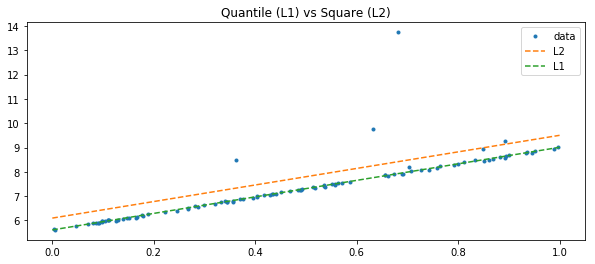

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
choice = numpy.random.choice(X.shape[0]-1, size=100)
xx = X.ravel()[choice]
yy = Y[choice]
ax.plot(xx, yy, '.', label="data")
xx = numpy.array([[0], [1]])
y1 = clr.predict(xx)
y2 = clq.predict(xx)
ax.plot(xx, y1, "--", label="L2")
ax.plot(xx, y2, "--", label="L1")
ax.set_title("Quantile (L1) vs Square (L2)");
ax.legend();

The L1 is clearly less sensible to extremas. The optimization algorithm is based on [Iteratively reweighted least squares](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares). It estimates a linear regression with error L2 then reweights each oberservation with the inverse of the error L1.

In [8]:
clq = QuantileLinearRegression(verbose=True, max_iter=20)
clq.fit(X, Y)

[QuantileLinearRegression.fit] iter=1 error=901.3803392180542
[QuantileLinearRegression.fit] iter=2 error=562.663383515471
[QuantileLinearRegression.fit] iter=3 error=522.8970177647805
[QuantileLinearRegression.fit] iter=4 error=522.3766707482777
[QuantileLinearRegression.fit] iter=5 error=522.0288331540892
[QuantileLinearRegression.fit] iter=6 error=521.6797263072117
[QuantileLinearRegression.fit] iter=7 error=521.4702236617843
[QuantileLinearRegression.fit] iter=8 error=521.3419287524464
[QuantileLinearRegression.fit] iter=9 error=521.206723757895
[QuantileLinearRegression.fit] iter=10 error=521.1212078810222
[QuantileLinearRegression.fit] iter=11 error=521.0410686984816
[QuantileLinearRegression.fit] iter=12 error=520.9841924800792
[QuantileLinearRegression.fit] iter=13 error=520.9349774362781
[QuantileLinearRegression.fit] iter=14 error=520.907415015473
[QuantileLinearRegression.fit] iter=15 error=520.8939558844767
[QuantileLinearRegression.fit] iter=16 error=520.8845502333198
[Qua

QuantileLinearRegression(copy_X=True, delta=0.0001, fit_intercept=True,
             max_iter=20, n_jobs=1, normalize=False, quantile=0.5,
             verbose=True)

In [9]:
clq.score(X,Y)

0.5208680582590082

## Regression with various quantiles

In [10]:
import numpy
X = numpy.random.random(1200)
eps1 = (numpy.random.random(900) - 0.5) * 0.5
eps2 = (numpy.random.random(300)) * 2
eps = numpy.hstack([eps1, eps2])
X = X.reshape((1200, 1))
Y = X.ravel() * 3.4 + 5.6 + eps + X.ravel() * X.ravel() * 8

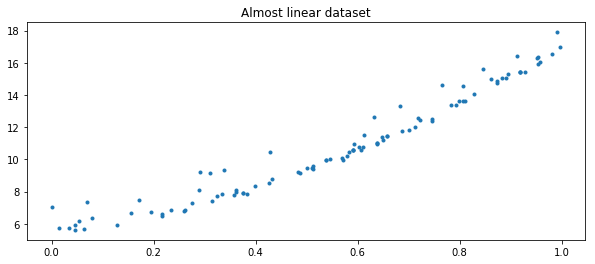

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
choice = numpy.random.choice(X.shape[0]-1, size=100)
xx = X.ravel()[choice]
yy = Y[choice]
ax.plot(xx, yy, '.', label="data")
ax.set_title("Almost linear dataset");

In [12]:
clqs = {}
for qu in [0.1, 0.25, 0.5, 0.75, 0.9]:
    clq = QuantileLinearRegression(quantile=qu)
    clq.fit(X, Y)
    clqs['q=%1.2f' % qu] = clq

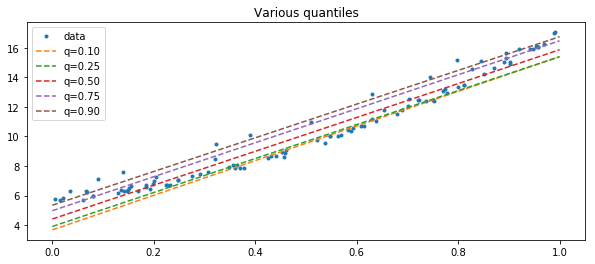

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
choice = numpy.random.choice(X.shape[0]-1, size=100)
xx = X.ravel()[choice]
yy = Y[choice]
ax.plot(xx, yy, '.', label="data")
xx = numpy.array([[0], [1]])
for qu in sorted(clqs):
    y = clqs[qu].predict(xx)
    ax.plot(xx, y, "--", label=qu)
ax.set_title("Various quantiles");
ax.legend();